# <center>CSX46 Final Project

### <center>The Minimum Threshold for Rewiring in Network Motif Discovery Procedures

### <center>Team Carbon: Ethan Smallwood, Taylor Dinkins, Amy Ly

# Abstract

The purpose of this report is to determine what the minimum randomized rewiring of a network is sufficient to detect statistically significant results for network motif discovery. The primary data which was tested to determine these minimum results was that of E. Coli transcription factor gene regulatory network. This was due to the ease and availability of the metabolic data, as well as the relatively constrained size of the dataset. As the number of rewirings required increases, the variation of motif counts stabilizes. Based on the statistical analysis from performing F-tests, the minimum required rewiring for all classes of motif (size = 3) for this E. Coli network was around 750.

# Introduction

To analyze the properties of a network, random rewirings of the original network can be carried out so as to generate background networks which can then be used as a reference for comparisons with the original network.

A primary point of interest is the count of network motifs; specific patterns of local interconnections with potential functional properties, which can be seen as the basic building blocks of complex networks.

The first step of this project is to find the minimum threshold for rewiring for E. Coli. Compared to a simple organism like E. Coli, multicellular organisms such as yeast or mice would have more complex gene regulatory networks in terms of number of vertices and edges. The minimum threshold required for rewiring these larger networks may need to increase so that resulting statistical tests regarding motif discoveries are valid.

<b>Under the assumption of an overrepresented motif:</b>

<u>Hypothesis:</u> As the number of random rewirings increase, then the empirical distribution of motif counts will widen since variance will increase.


# Package Installations


In [ ]:
!apt-get install libcairo2-dev libjpeg-dev libgif-dev
!pip install pycairo
import cairo
!pip install python-igraph
import igraph, math, collections, pprint
!pip install pandas
!pip install matplotlib
import pandas as pd
import random
import itertools
from itertools import product
import matplotlib.pyplot as plt
!pip install seaborn
import seaborn as sns
sns.set()
import numpy as np
import scipy


Reading package lists... Done
Building dependency tree       
Reading state information... Done
libcairo2-dev is already the newest version (1.16.0-4ubuntu1).
libgif-dev is already the newest version (5.1.9-1).
libjpeg-dev is already the newest version (8c-2ubuntu8).
0 upgraded, 0 newly installed, 0 to remove and 22 not upgraded.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Setting Up the Networks

In [ ]:
random.seed(123)

**E Coli Network**

In [ ]:
!curl https://csx46.s3-us-west-2.amazonaws.com/ecolitfnet.txt> ecolitfnet.txt

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  2381  100  2381    0     0   5291      0 --:--:-- --:--:-- --:--:--  5279


To make sure results are consistent, we'll set the random seed.

Make an igraph directed graph from the network.

In [ ]:
edge_list = pd.read_csv("ecolitfnet.txt", sep="\t", names=["source","target"]).drop_duplicates()
graph = igraph.Graph.TupleList(edge_list[["source","target"]].values.tolist(), directed=True)
graph.summary()

'IGRAPH DN-- 133 261 -- \n+ attr: name (v)'

**Yeast Network**

In [ ]:
!curl http://cosbi3.ee.ncku.edu.tw/YTRP/download/TRP_direct_regulatory_network.txt> ytrp_network.txt

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1081k  100 1081k    0     0   245k      0  0:00:04  0:00:04 --:--:--  268k


In [ ]:
ytrp_edgelist = pd.read_csv("ytrp_network.txt", sep="\t", names=["source","target", "stage", "sequence"]).drop_duplicates()[["source", "target"]]
yeast_graph = igraph.Graph.TupleList(ytrp_edgelist.values.tolist(), directed=True)
yeast_graph.summary()

'IGRAPH DN-- 3300 17029 -- \n+ attr: name (v)'

**Mouse Network**

In [ ]:
!wget --no-check-certificat https://regnetworkweb.org/download/mouse.zip

!unzip /content/mouse.zip

--2023-03-07 16:08:44--  https://regnetworkweb.org/download/mouse.zip
Resolving regnetworkweb.org (regnetworkweb.org)... 52.202.208.244, 52.0.10.217
Connecting to regnetworkweb.org (regnetworkweb.org)|52.202.208.244|:443... connected.
  Unable to locally verify the issuer's authority.
HTTP request sent, awaiting response... 200 OK
Length: 2584115 (2.5M) [application/zip]
Saving to: ‘mouse.zip’

mouse.zip           100%[===================>]   2.46M  --.-KB/s    in 0.07s   

2023-03-07 16:08:45 (33.0 MB/s) - ‘mouse.zip’ saved [2584115/2584115]

Archive:  /content/mouse.zip
  inflating: mouse.source            
  inflating: mouse.node              


In [ ]:
pd.read_table('mouse.source', names=['Source', 'Source_ID', 'Target', 'Target_ID']).head(6)

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Source,Source_ID,Target,Target_ID
0,LOC100047997,100047997,Npy,109648
1,LOC100047997,100047997,Arc,11838
2,LOC100047997,100047997,Bcl2,12043
3,LOC100047997,100047997,Bdnf,12064
4,LOC100047997,100047997,Crh,12918
5,LOC100047997,100047997,Fos,14281


In [ ]:
mouse_edgelist = pd.read_table('mouse.source', names=['Source', 'Source_num', 'Target', 'Target_ID']).drop_duplicates()[["Source", "Target"]]

mouse_edgelist.head(6)

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Source,Target
0,LOC100047997,Npy
1,LOC100047997,Arc
2,LOC100047997,Bcl2
3,LOC100047997,Bdnf
4,LOC100047997,Crh
5,LOC100047997,Fos


In [ ]:
mouse_graph = igraph.Graph.TupleList(mouse_edgelist.values.tolist(), directed=True)
mouse_graph.summary()

'IGRAPH DN-- 20737 323636 -- \n+ attr: name (v)'

# Methods

Go over a brief outline of our code chunks and what they're supposed to output.

For E Coli and Yeast dataset (Mouse may be too much to handle), create the plot of Variances vs Number of Rewirings and Means vs Number of Rewirings. We want to focus at least on the range of 200 to 1400.



# Important Simulation Functions

Generation of randomized networks is important in forming the correct background/reference distribution to compare the empirical motif count results to.

The random networks will conserve the degree distribution of the real network and have the same number of nodes. The connections will be randomly cut and rewired to give rise to random graph.

In [ ]:
def get_rand_rewired_motifs(graph, n, B, motif_size):
  res = []
  for i in range(B):
    dummy_graph = igraph.Graph.copy(graph)
    dummy_graph.rewire(n=n)
    mot_counts = igraph.Graph.motifs_randesu(dummy_graph, size=motif_size)
    res.append(mot_counts)
  return np.array(res)

# B = number of simulations
# n = number of rewirings

def overrep_motif(graph, size):
  motifs = pd.DataFrame(graph.motifs_randesu(size=size))
  return(motifs.idxmax()[0])

def get_indices(motifs):

  ind = np.where(np.logical_or(np.isnan(motifs), motifs==0))[0]
  #retrive only meaningful motif types
  class_ind = []

  for i in range(motifs.shape[0]):
    if i not in ind:
      class_ind.append(i)
  return(class_ind)

# Important Statistical Functions

## Assumptions for F-Test

It's important to check the assumptions required to perform an F-test. Otherwise, our conclusion can be misleading or invalid.

The following article talks about the limitations researchers face in the field of motif discovery.
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7191746/

The assumptions that we make are:

1. Samples are randomly drawn from the populations
2. Independence
3. Population distributions are approximately normal


In [ ]:
def f_test(first_samp_var, second_samp_var, N1, N2):
    f = first_samp_var/second_samp_var #calculate F test statistic
    dfn = N1-1 #define degrees of freedom numerator
    dfd = N2-1 #define degrees of freedom denominator
    p = 1-scipy.stats.f.cdf(f, dfn, dfd) #find p-value of F test statistic
    return f, p

#F-test functions for when we have a dataframe with multiple motif types

def run_all_f_tests(vars_table_temp, motif_classes_set):
  results_dict = {}
  for mclass in sorted(list(motif_classes_set)):
    curr_motif = vars_table_temp[vars_table_temp['motif'] == mclass]
    # fix second sample variance for N_sim=1450
    second_samp_var = curr_motif[curr_motif['N_sim']==1450]['vars'].values[0]
    n_s = []
    f_s = []
    p_s = []
    # iterate in reverse to find first statistically significant difference
    for val in curr_motif['N_sim'].values[0:-1][::-1]:
      first_samp = curr_motif[curr_motif['N_sim'] == val]
      first_samp_var = first_samp['vars'].values[0]
      if(first_samp_var == 0.0):
        first_samp_var += 1e-6
      if(second_samp_var == 0.0):
        second_samp_var += 1e-6
      N1 = val
      f, p = f_test(first_samp_var, second_samp_var, N1, N2)
      n_s.append(val)
      f_s.append(f)
      p_s.append(p)

    n_s = np.array(n_s)
    f_s = np.array(f_s)
    p_s = np.array(p_s)
    curr_results = {}
    curr_results['N'] = n_s
    curr_results['F'] = f_s
    curr_results['P'] = p_s
    results_dict[mclass] = curr_results

  return results_dict


#runs the F-test for one motif type

def run_f_tests(vars_table_temp):
  second_samp_var = vars_table_temp.loc[vars_table_temp['N_sim'] == 10000, 'vars'].values[0]
  n_s = []
  f_s = []
  p_s = []

    # iterate in reverse to find first statistically significant difference
  for val in vars_table_temp['N_sim']:
    first_samp_var = vars_table_temp.loc[vars_table_temp['N_sim'] == val, 'vars'].values[0]
    if(first_samp_var == 0.0):
      first_samp_var += 1e-6
    if(second_samp_var == 0.0):
      second_samp_var += 1e-6
    N1 = val
    N2 = 12200

    dfn = N1-1 #define degrees of freedom numerator
    dfd = N2-1 #define degrees of freedom denominator
    f = first_samp_var/second_samp_var
    p = 1-scipy.stats.f.cdf(f, dfn, dfd) #find p-value of F test statistic

    n_s.append(val)
    f_s.append(f)
    p_s.append(p)
    test_df = pd.DataFrame({
      'n_s': n_s,
      'f_s': f_s,
      'p_s': p_s
    })

  return test_df



# Which motif type are overrepresented in each network?

Unfortunately, we cannot analyze the mouse or yeast gene regulatory network the same way that we did for E Coli with our computing resources in a timely manner. We may only be able to make a plot for the size=3 motif that is the most overrrepresented.

Based on the code results below, we should be focusing on class type 7 (index = 6)

In [ ]:
overrep_motif(graph, 3)
# E Coli


6

In [ ]:
overrep_motif(yeast_graph, 3)
# Yeast

6

In [ ]:
overrep_motif(mouse_graph, 3)

# Mouse

6

# Does motif type affect the number of random rewirings needed? (Size=3)

Simulate changing both parameters (N and class type) at the same time. Then plot all the curves onto one plot. Ideally, what we have N plotted on the x-axis and then a series of curves on the same plot that can be color coded by class type. Note that only class size 3 and 4 are supported by igraph.


Ideally we should see a plateau and that will give us an idea of at what n do we get diminishing returns. (Look for the elbow)

Is the observed motif count consistent with values that arise from randomly rewired networks with preserved degree distributions?


In [ ]:
motifs = pd.DataFrame(graph.motifs_randesu(size=3))
print(motifs)

         0
0      NaN
1      NaN
2    275.0
3      NaN
4    125.0
5     39.0
6   1676.0
7     47.0
8     25.0
9     68.0
10     0.0
11     0.0
12     2.0
13    10.0
14     1.0
15     1.0


In [ ]:
# initialize lists
N_list = list(range(50, 1500, 50))
type_list = get_indices(motifs)

# create empty list to store the combinations
unique_combo = []

# Extract Combination Mapping in two lists
# using zip() + product()
unique_combo= list(product(N_list, type_list))

print(unique_combo)

[(50, 2), (50, 4), (50, 5), (50, 6), (50, 7), (50, 8), (50, 9), (50, 12), (50, 13), (50, 14), (50, 15), (100, 2), (100, 4), (100, 5), (100, 6), (100, 7), (100, 8), (100, 9), (100, 12), (100, 13), (100, 14), (100, 15), (150, 2), (150, 4), (150, 5), (150, 6), (150, 7), (150, 8), (150, 9), (150, 12), (150, 13), (150, 14), (150, 15), (200, 2), (200, 4), (200, 5), (200, 6), (200, 7), (200, 8), (200, 9), (200, 12), (200, 13), (200, 14), (200, 15), (250, 2), (250, 4), (250, 5), (250, 6), (250, 7), (250, 8), (250, 9), (250, 12), (250, 13), (250, 14), (250, 15), (300, 2), (300, 4), (300, 5), (300, 6), (300, 7), (300, 8), (300, 9), (300, 12), (300, 13), (300, 14), (300, 15), (350, 2), (350, 4), (350, 5), (350, 6), (350, 7), (350, 8), (350, 9), (350, 12), (350, 13), (350, 14), (350, 15), (400, 2), (400, 4), (400, 5), (400, 6), (400, 7), (400, 8), (400, 9), (400, 12), (400, 13), (400, 14), (400, 15), (450, 2), (450, 4), (450, 5), (450, 6), (450, 7), (450, 8), (450, 9), (450, 12), (450, 13), (450, 

In [ ]:
res_dict = {}

means =[]
vars =[]
stds = []
N_sim =[]
motif_type =[]


for i, j in unique_combo:
  res_dict[i] = get_rand_rewired_motifs(graph, n=i, B=10000, motif_size=3)
  means.append(res_dict[i].mean(0)[j])
  vars.append(res_dict[i].var(0)[j])
  stds.append(res_dict[i].std(0)[j])
  N_sim.append(i)
  motif_type.append(j)


In [ ]:
summary_table = pd.DataFrame(
    {'N_sim': N_sim,
     'motif': motif_type,
     'means': means,
     'vars': vars,
     'stds': stds
    })

print(summary_table)

     N_sim  motif      means        vars       stds
0       50      2   310.0227  169.530785  13.020399
1       50      4   197.5326  911.307337  30.187867
2       50      5    34.8600   95.585200   9.776768
3       50      6  1716.6618  581.994421  24.124561
4       50      7    49.8547   83.134188   9.117795
..     ...    ...        ...         ...        ...
314   1450      9    18.5760  464.493424  21.552110
315   1450     12     0.3462    0.583346   0.763771
316   1450     13     0.8433    3.829745   1.956973
317   1450     14     0.0156    0.015557   0.124726
318   1450     15     0.0000    0.000000   0.000000

[319 rows x 5 columns]


motif
2     AxesSubplot(0.125,0.125;0.775x0.755)
4     AxesSubplot(0.125,0.125;0.775x0.755)
5     AxesSubplot(0.125,0.125;0.775x0.755)
6     AxesSubplot(0.125,0.125;0.775x0.755)
7     AxesSubplot(0.125,0.125;0.775x0.755)
8     AxesSubplot(0.125,0.125;0.775x0.755)
9     AxesSubplot(0.125,0.125;0.775x0.755)
12    AxesSubplot(0.125,0.125;0.775x0.755)
13    AxesSubplot(0.125,0.125;0.775x0.755)
14    AxesSubplot(0.125,0.125;0.775x0.755)
15    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

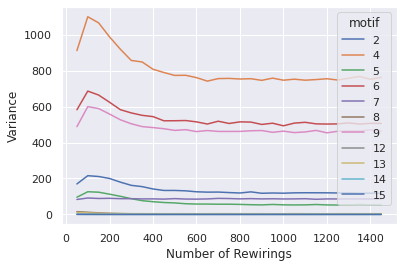

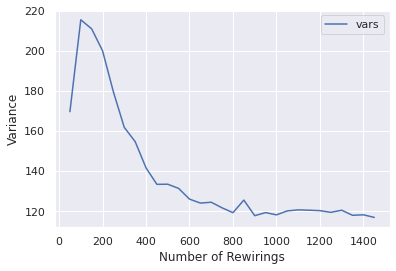

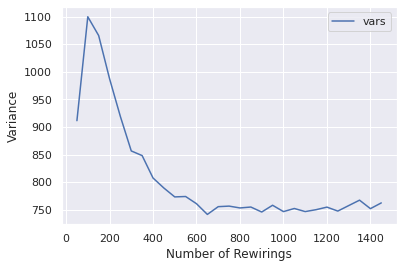

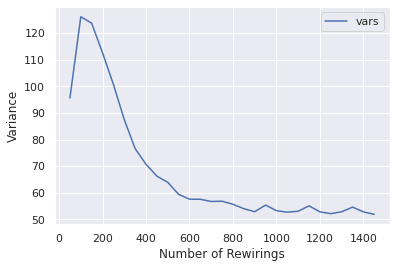

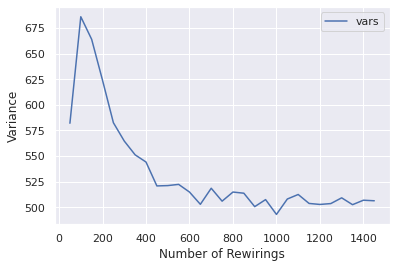

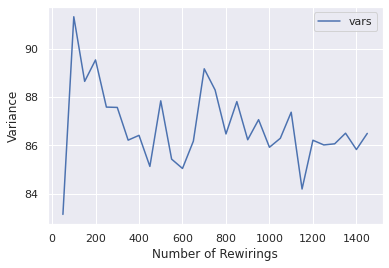

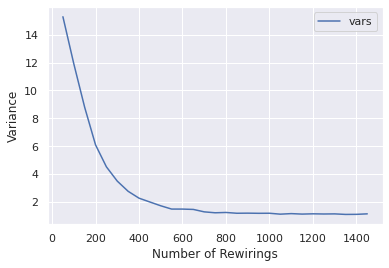

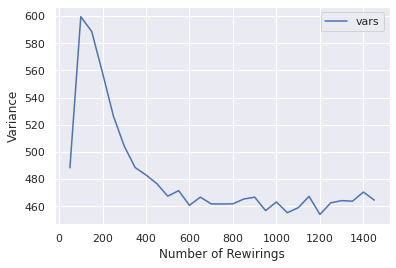

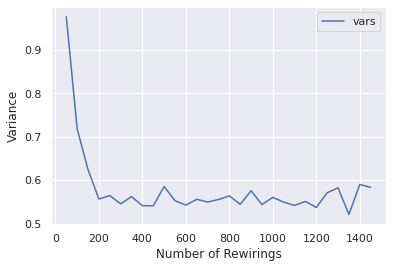

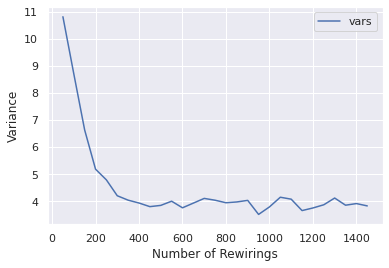

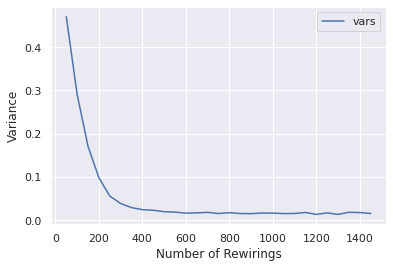

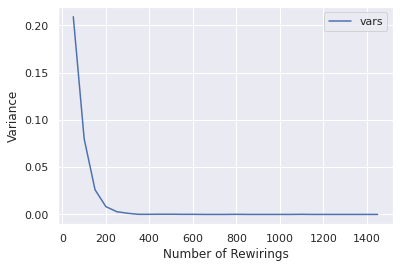

In [ ]:
vars_table = pd.DataFrame(
    {'N_sim': N_sim,
     'motif': motif_type,
     'vars': vars
    })


vars_table.pivot_table(values="vars",index="N_sim",columns="motif").plot(legend=True, xlabel="Number of Rewirings", ylabel="Variance")

summary_table.groupby("motif").plot(x='N_sim', y='vars', xlabel="Number of Rewirings", ylabel="Variance")

motif
2     AxesSubplot(0.125,0.125;0.775x0.755)
4     AxesSubplot(0.125,0.125;0.775x0.755)
5     AxesSubplot(0.125,0.125;0.775x0.755)
6     AxesSubplot(0.125,0.125;0.775x0.755)
7     AxesSubplot(0.125,0.125;0.775x0.755)
8     AxesSubplot(0.125,0.125;0.775x0.755)
9     AxesSubplot(0.125,0.125;0.775x0.755)
12    AxesSubplot(0.125,0.125;0.775x0.755)
13    AxesSubplot(0.125,0.125;0.775x0.755)
14    AxesSubplot(0.125,0.125;0.775x0.755)
15    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

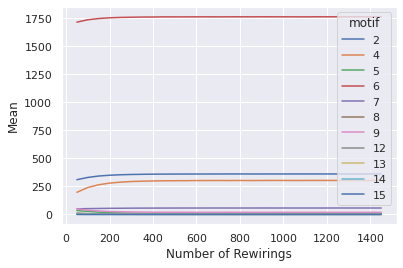

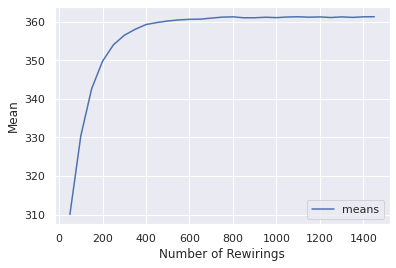

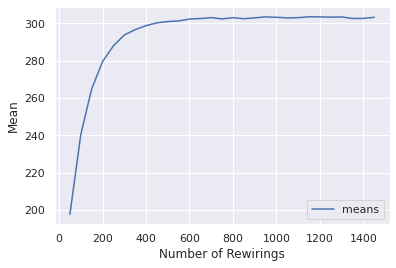

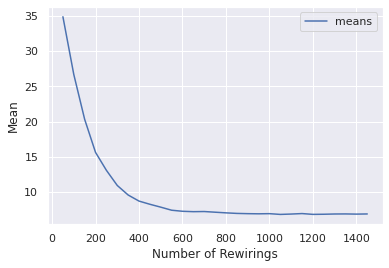

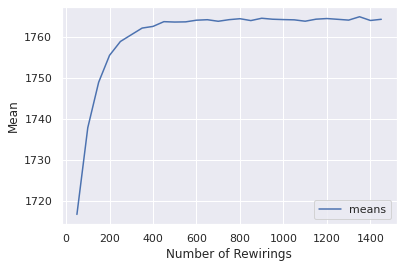

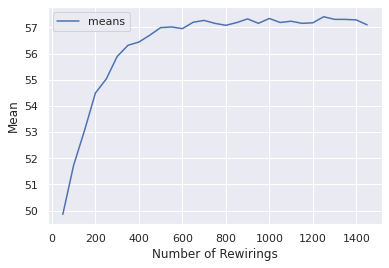

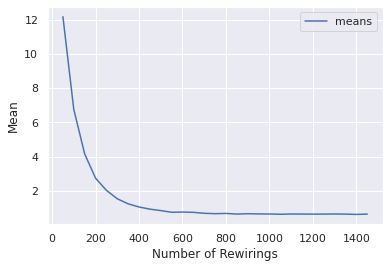

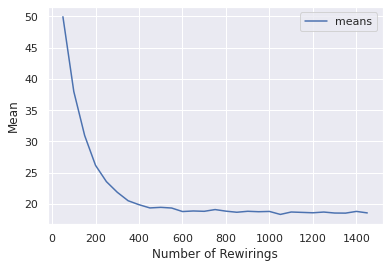

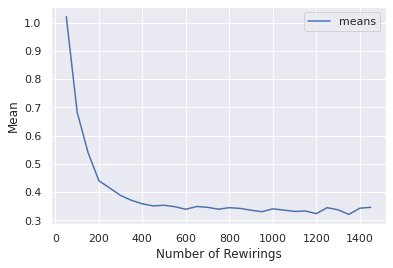

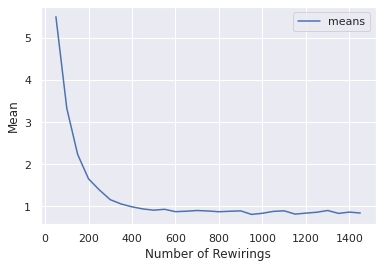

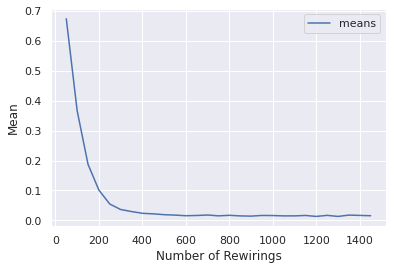

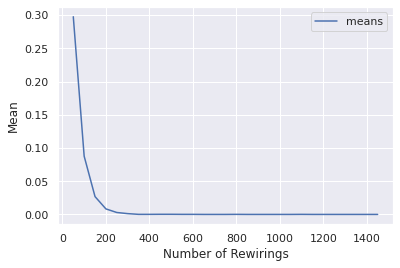

In [ ]:
means_table = pd.DataFrame(
    {'N_sim': N_sim,
     'motif': motif_type,
     'means': means
    })

means_table.pivot_table(values="means",index="N_sim",columns="motif").plot(legend=True, xlabel="Number of Rewirings", ylabel="Mean")

summary_table.groupby("motif").plot(x='N_sim', y='means', legend=True, xlabel="Number of Rewirings", ylabel="Mean")


# Is the FFL motif Overrepresented?

(0.0, 100.0)

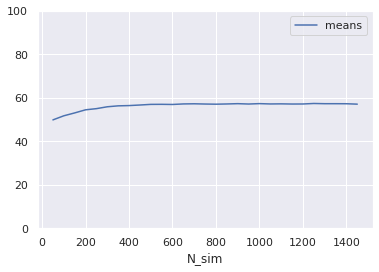

In [ ]:
# check the FFL motif
FFL_motif = means_table[means_table['motif'] == 7]
FFL_motif.plot(x='N_sim', y='means')
plt.ylim(0.0, 100.0)

We can run a t-test on the means to determine where there is statistical difference between the randomly generated means and the actual value of the size-3 motif.

# Motif Size, Number of Rewirings for Size = 4

In [ ]:
motifs_size4 = graph.motifs_randesu(size=4)


N_list = list(range(50, 1500, 50))
type_list = get_indices(motifs_size4)

# create empty list to store the combinations
unique_combo = []

# Extract Combination Mapping in two lists
# using zip() + product()
unique_combo= list(product(N_list, type_list))

print(unique_combo)

[(50, 3), (50, 7), (50, 8), (50, 12), (50, 13), (50, 14), (100, 3), (100, 7), (100, 8), (100, 12), (100, 13), (100, 14), (150, 3), (150, 7), (150, 8), (150, 12), (150, 13), (150, 14), (200, 3), (200, 7), (200, 8), (200, 12), (200, 13), (200, 14), (250, 3), (250, 7), (250, 8), (250, 12), (250, 13), (250, 14), (300, 3), (300, 7), (300, 8), (300, 12), (300, 13), (300, 14), (350, 3), (350, 7), (350, 8), (350, 12), (350, 13), (350, 14), (400, 3), (400, 7), (400, 8), (400, 12), (400, 13), (400, 14), (450, 3), (450, 7), (450, 8), (450, 12), (450, 13), (450, 14), (500, 3), (500, 7), (500, 8), (500, 12), (500, 13), (500, 14), (550, 3), (550, 7), (550, 8), (550, 12), (550, 13), (550, 14), (600, 3), (600, 7), (600, 8), (600, 12), (600, 13), (600, 14), (650, 3), (650, 7), (650, 8), (650, 12), (650, 13), (650, 14), (700, 3), (700, 7), (700, 8), (700, 12), (700, 13), (700, 14), (750, 3), (750, 7), (750, 8), (750, 12), (750, 13), (750, 14), (800, 3), (800, 7), (800, 8), (800, 12), (800, 13), (800, 14

In [ ]:
res_dict = {}

means =[]
vars =[]
stds = []
N_sim =[]
motif_type =[]


for i, j in unique_combo:
  res_dict[i] = get_rand_rewired_motifs(graph, n=i, B=10000, motif_size=4)
  means.append(res_dict[i].mean(0)[j])
  vars.append(res_dict[i].var(0)[j])
  stds.append(res_dict[i].std(0)[j])
  N_sim.append(i)
  motif_type.append(j)


In [ ]:
summary_table = pd.DataFrame(
    {'N_sim': N_sim,
     'motif': motif_type,
     'means': means,
     'vars': vars,
     'stds': stds
    })

print(summary_table)

     N_sim  motif      means           vars        stds
0       50      3   418.2693    1515.925778   38.934892
1       50      7   170.1997    2567.603820   50.671529
2       50      8    57.0832     517.328478   22.744856
3       50     12   406.8476    5226.619974   72.295366
4       50     13  5729.9297   90859.357158  301.428859
..     ...    ...        ...            ...         ...
169   1450      7   401.1450    2665.029975   51.623928
170   1450      8    16.7250     538.074175   23.196426
171   1450     12   648.6322    8239.098523   90.769480
172   1450     13  6223.4982  144793.673597  380.517639
173   1450     14   196.4184     827.257741   28.762089

[174 rows x 5 columns]


motif
3     AxesSubplot(0.125,0.125;0.775x0.755)
7     AxesSubplot(0.125,0.125;0.775x0.755)
8     AxesSubplot(0.125,0.125;0.775x0.755)
12    AxesSubplot(0.125,0.125;0.775x0.755)
13    AxesSubplot(0.125,0.125;0.775x0.755)
14    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

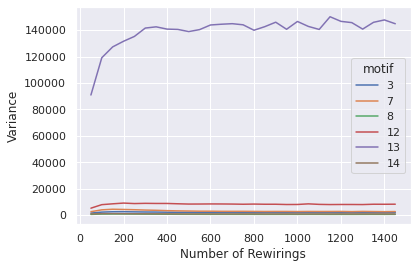

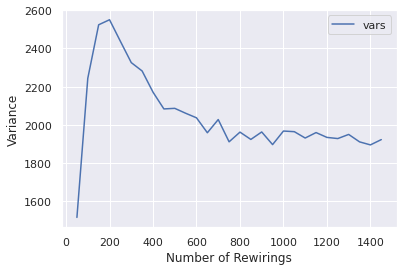

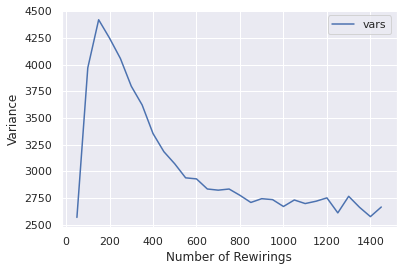

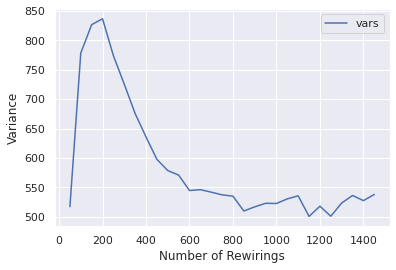

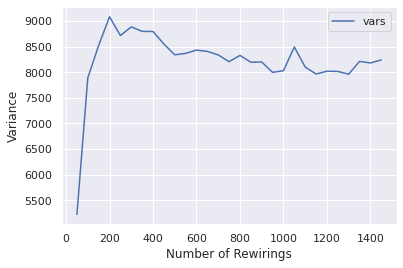

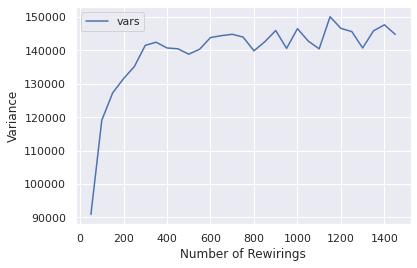

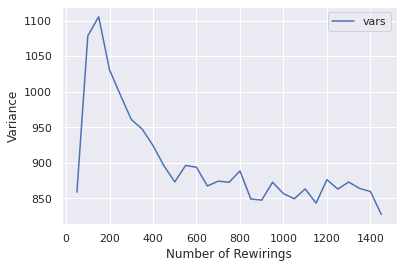

In [ ]:
vars_table = pd.DataFrame(
    {'N_sim': N_sim,
     'motif': motif_type,
     'vars': vars
    })


vars_table.pivot_table(values="vars",index="N_sim",columns="motif").plot(legend=True, xlabel="Number of Rewirings", ylabel="Variance")

summary_table.groupby("motif").plot(x='N_sim', y='vars', xlabel="Number of Rewirings", ylabel="Variance")

motif
3     AxesSubplot(0.125,0.125;0.775x0.755)
7     AxesSubplot(0.125,0.125;0.775x0.755)
8     AxesSubplot(0.125,0.125;0.775x0.755)
12    AxesSubplot(0.125,0.125;0.775x0.755)
13    AxesSubplot(0.125,0.125;0.775x0.755)
14    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

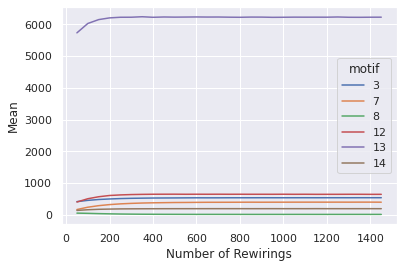

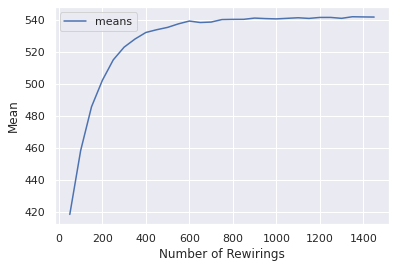

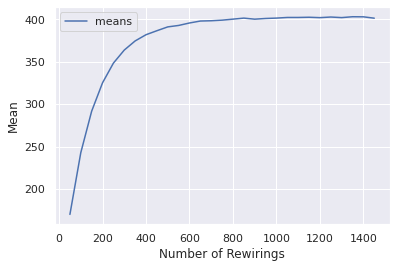

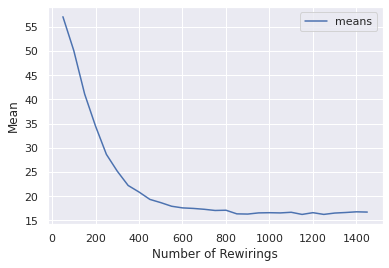

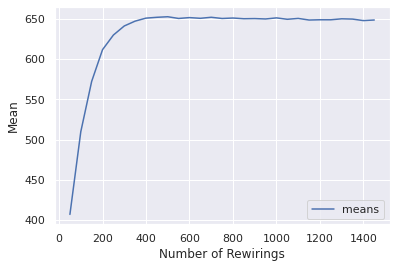

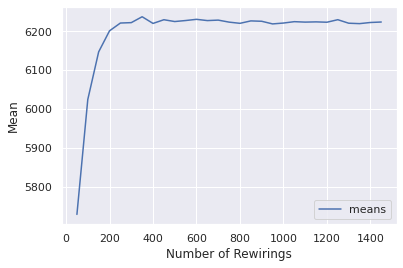

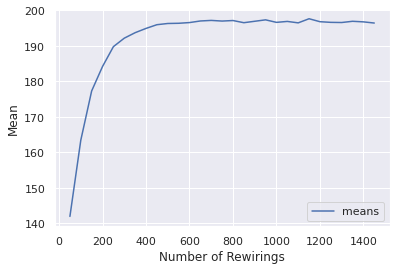

In [ ]:
means_table = pd.DataFrame(
    {'N_sim': N_sim,
     'motif': motif_type,
     'means': means
    })

means_table.pivot_table(values="means",index="N_sim",columns="motif").plot(legend=True, xlabel="Number of Rewirings", ylabel="Mean")

summary_table.groupby("motif").plot(x='N_sim', y='means', legend=True, xlabel="Number of Rewirings", ylabel="Mean")

# Rewiring Simulation Results

**E Coli Simulation Plots**

In [ ]:
N_list = list(range(50, 1500, 20))

res_dict_E = {}

means_E =[]
vars_E =[]
N_sim_E =[]

for i in N_list:
  res_dict_E[i] = get_rand_rewired_motifs(graph, n=i, B=10000, motif_size=3)
  means_E.append(res_dict_E[i].mean(0)[6])
  vars_E.append(res_dict_E[i].var(0)[6])
  N_sim_E.append(i)


<AxesSubplot:xlabel='Number of Rewirings', ylabel='Variance'>

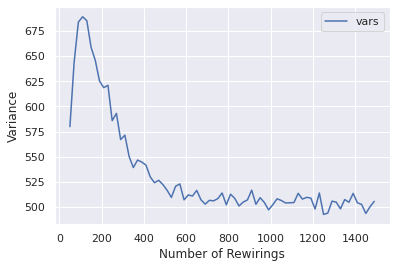

In [ ]:
E_table = pd.DataFrame(
    {'N_sim': N_sim_E,
     'means': means_E,
     'vars': vars_E,
    })

E_table.pivot_table(values="vars",index="N_sim").plot(xlabel="Number of Rewirings", ylabel="Variance")

**Yeast Simulation Plots**

Due to the length of time it takes, we will only focus on the simulation plots for motif class 6. It takes about 3 hours for the current code parameters.

In [ ]:
N_list = list(range(1000, 20000, 1000))

res_dict_Y = {}

means_Y =[]
vars_Y =[]
N_sim_Y =[]

for i in N_list:
  res_dict_Y[i] = get_rand_rewired_motifs(yeast_graph, n=i, B=50, motif_size=3)
  means_Y.append(res_dict_Y[i].mean(0)[6])
  vars_Y.append(res_dict_Y[i].var(0)[6])
  N_sim_Y.append(i)

<AxesSubplot:xlabel='Number of Rewirings', ylabel='Variance'>

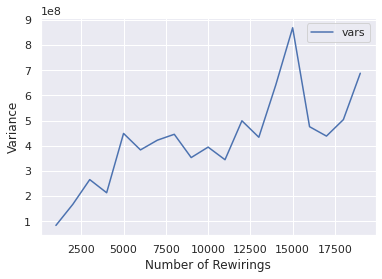

In [ ]:
Y_table = pd.DataFrame(
    {'N_sim': N_sim_Y,
     'means': means_Y,
     'vars': vars_Y,
    })

Y_table.pivot_table(values="vars",index="N_sim").plot(xlabel="Number of Rewirings", ylabel="Variance")

**Mouse Simulation Plots**

We are NOT going to attempt simulation plots for the mouse network because we don't have the computing power for this.

# Statistical Test Results

Statistical testing will be done for overrepresented motif types. Overrepresented motifs will be determined through Z-score testing where the count of the motif in the empirical network is compared to the distribution of its counts in a set of simulated random networks. (We want to focus on the motif class where the Z-score is significant, like in Section 2 of HW2 when we look at size=4)

When motifs are over-represented, we assume it's because they are evolutionarily selected for function. (Though, it may also be due to spatial clustering)

To determine where the mimimum threshold for rewiring is for these overrepresented motifs, we will be performing F-tests. An F-test will be answering the question of "Do the samples of motif counts come from populations with equal variances?"

An example of an F-test conclusion is:

The F test indicates that there is not enough evidence to reject the null hypothesis that the two motif count variancess are equal at the 0.05 significance level.

Since we see that the variance and means start to trend differently past 200 rewirings, we will compare the variances past 200 rewirings to that at 1450 rewirings. The p-values that result will be plotted so that we can easily assess significance.

**E Coli**

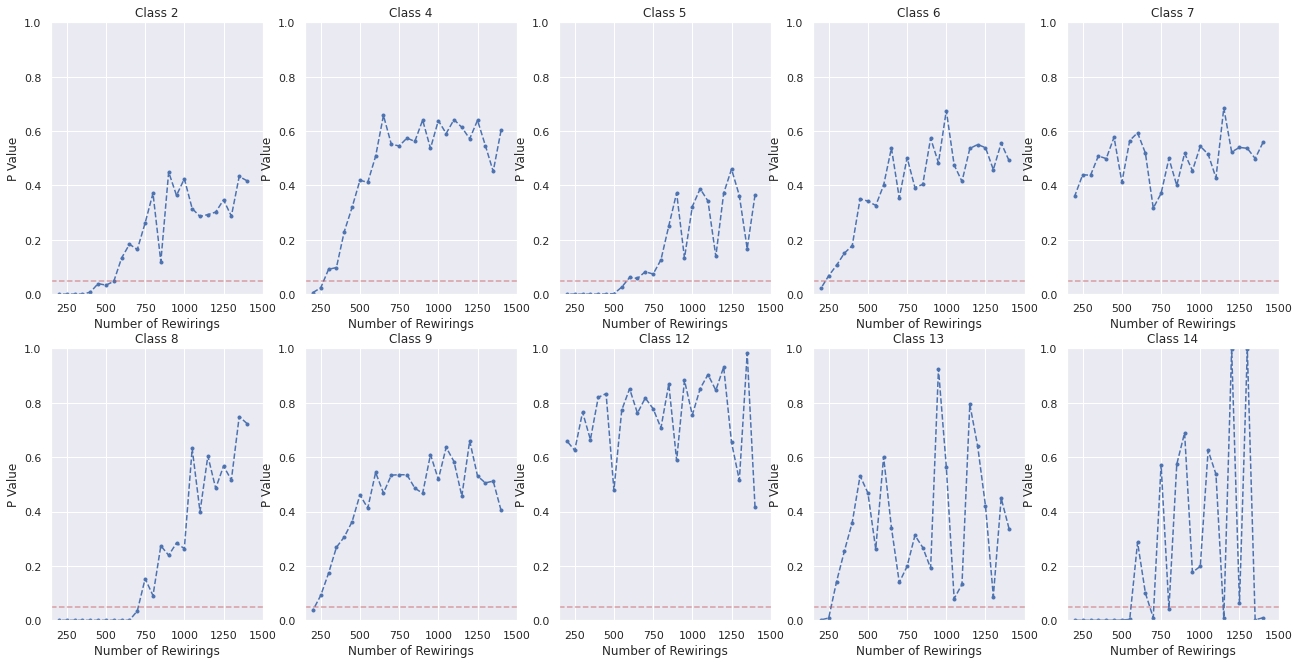

In [ ]:
"""
THIS IS THE BOX ABOVE BUT FOR ALL THE CLASSES OF SIZE=3
"""

# zoom in on "sufficient samples", at minimum N=200
vars_table_temp = vars_table[vars_table['N_sim']>=200].copy()
means_table_temp = means_table[means_table['N_sim']>=200].copy()
motif_classes_set = set(vars_table_temp['motif'])

N2 = 1450

results_dict = run_all_f_tests(vars_table_temp, motif_classes_set)

fig, ax = plt.subplots(2, 5, figsize=(22, 11))
mclass_ind = 0
motif_classes_list = sorted(list(motif_classes_set))
for i in range(2): # loop over classes ignoring the last one
  for j in range(5):
    curr_N = results_dict[motif_classes_list[mclass_ind]]['N']
    curr_P = results_dict[motif_classes_list[mclass_ind]]['P']
    ax[i, j].plot(curr_N, curr_P, '--.', label='P-Values {}'.format(motif_classes_list[mclass_ind]))
    ax[i, j].axhline(y = 0.05, color = 'r', linestyle = '--', alpha=0.5, label='Threshold p=0.05')
    ax[i, j].title.set_text("Class {}".format(motif_classes_list[mclass_ind]))
    ax[i, j].set_xlabel('Number of Rewirings')
    ax[i, j].set_ylabel("P Value")
    ax[i, j].set_ylim(0.0, 1.0)
    ax[i, j].set_xlim(150, 1500)
    mclass_ind += 1
# for mclass in sorted(list(motif_classes_set)):
#   #visually inspect p-values
#   plt.plot(results_dict[mclass]['N'], results_dict[mclass]['P'], '--o', label='P-Values {}'.format(mclass))
# plt.axhline(y = 0.05, color = 'r', linestyle = '--', alpha=0.5, label='Threshold p=0.05')
# #plt.legend(loc='best');

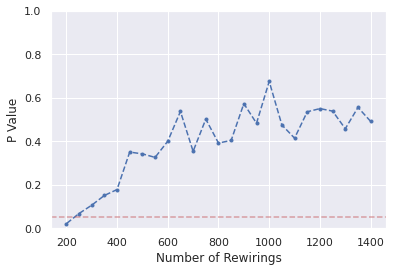

In [ ]:
# look at just class 6
plt.plot(results_dict[6]['N'], results_dict[6]['P'], '--.')
plt.ylim(0.0, 1.0)
plt.xlabel("Number of Rewirings")
plt.ylabel("P Value")
plt.axhline(y = 0.05, color = 'r', linestyle = '--', alpha=0.5, label='Threshold p=0.05')

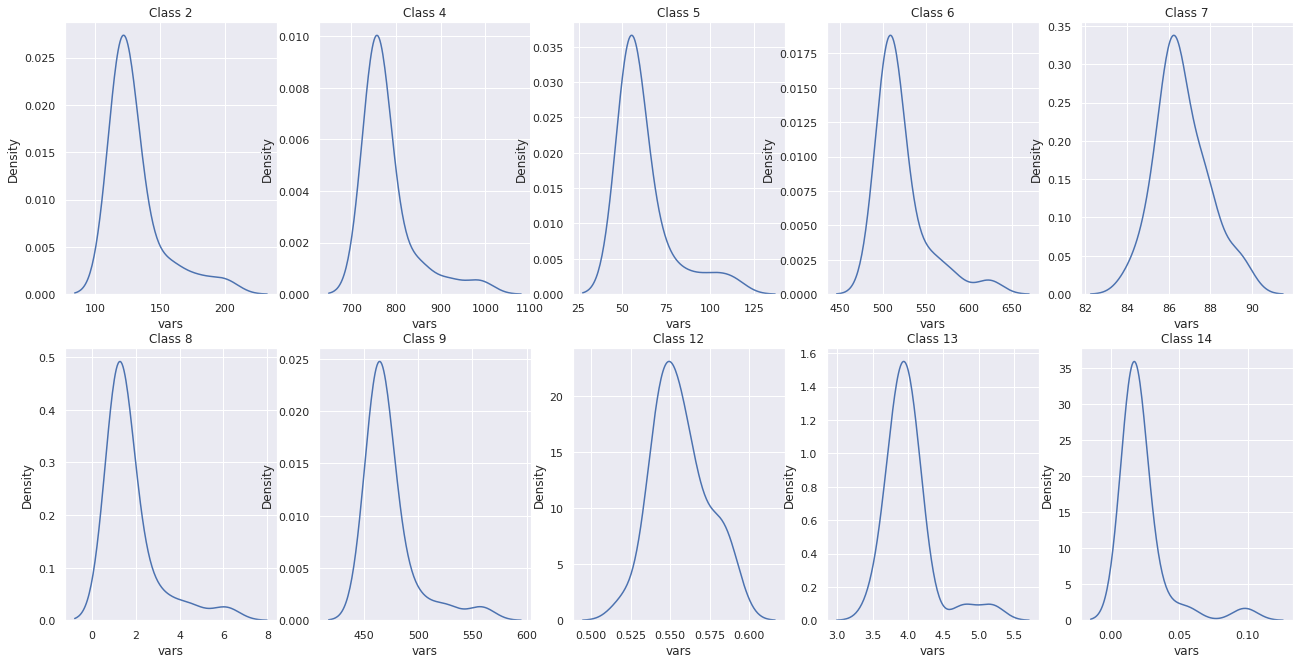

In [ ]:
# check if our F-test is even valid (variance must be close to Gaussian distributed)
fig, ax = plt.subplots(2, 5, figsize=(22, 11))
mclass_ind = 0
motif_classes_list = sorted(list(motif_classes_set))
for i in range(2): # loop over classes ignoring the last one
  for j in range(5):
    curr_class = motif_classes_list[mclass_ind]
    sns.kdeplot(vars_table_temp[vars_table_temp['motif'] == curr_class]['vars'], ax=ax[i, j])
    ax[i,j].title.set_text("Class {}".format(curr_class))
    mclass_ind += 1

In [ ]:
for mclass in sorted(list(motif_classes_set)):
  curr_means = means_table_temp[means_table_temp['motif'] == mclass]
  print("Class {} Mean Max {} Mean Min {}".format(mclass,
                                                  curr_means[curr_means['N_sim'] == 1450]['means'].values[0],
                                                  curr_means[curr_means['N_sim'] == 200]['means'].values[0]))

Class 2 Mean Max 361.3315 Mean Min 349.7768
Class 4 Mean Max 303.2209 Mean Min 279.4817
Class 5 Mean Max 6.9024 Mean Min 15.6304
Class 6 Mean Max 1764.2839 Mean Min 1755.481
Class 7 Mean Max 57.0952 Mean Min 54.4898
Class 8 Mean Max 0.6371 Mean Min 2.7377
Class 9 Mean Max 18.576 Mean Min 26.1829
Class 12 Mean Max 0.3462 Mean Min 0.4402
Class 13 Mean Max 0.8433 Mean Min 1.6559
Class 14 Mean Max 0.0156 Mean Min 0.1011
Class 15 Mean Max 0.0 Mean Min 0.0083


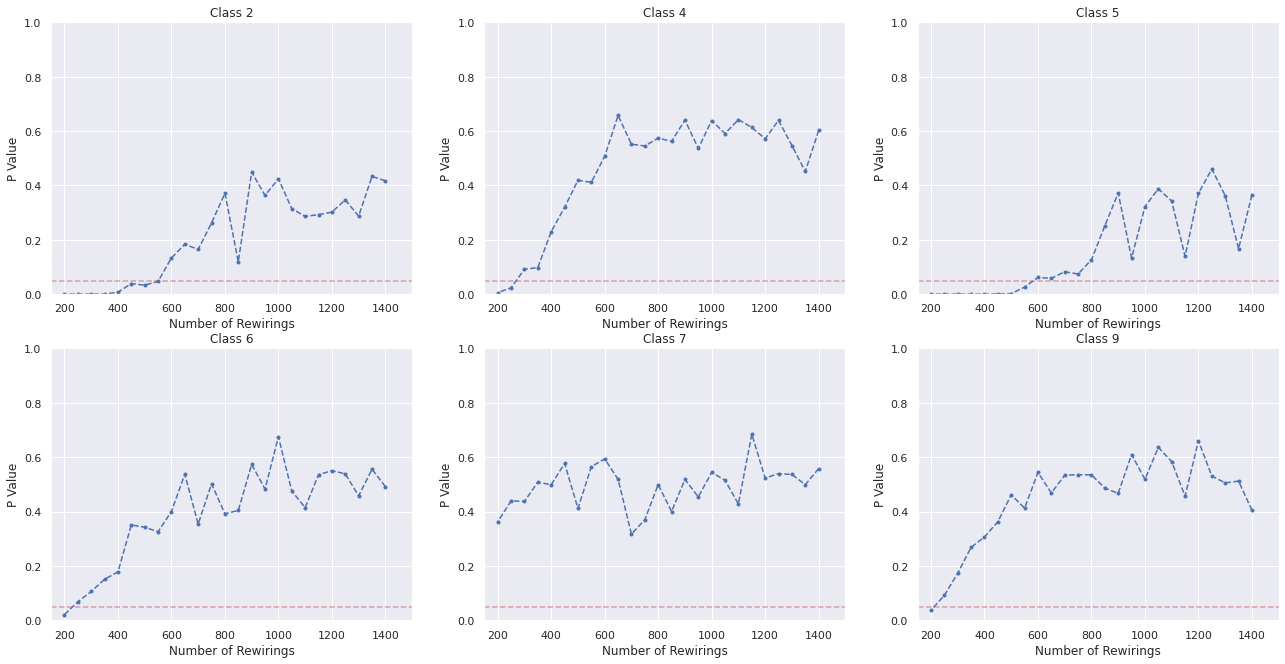

In [ ]:
# we should probably ignore classes 8, 12, 13, 14, and 15 (not enough counts of each motif to impact the variance)

fig, ax = plt.subplots(2, 3, figsize=(22, 11))
mclass_ind = 0
motif_classes_list = [2, 4, 5, 6, 7, 9]
for i in range(2): # loop over classes ignoring the last one
  for j in range(3):
    curr_N = results_dict[motif_classes_list[mclass_ind]]['N']
    curr_P = results_dict[motif_classes_list[mclass_ind]]['P']
    ax[i, j].plot(curr_N, curr_P, '--.', label='P-Values {}'.format(motif_classes_list[mclass_ind]))
    ax[i, j].axhline(y = 0.05, color = 'r', linestyle = '--', alpha=0.5, label='Threshold p=0.05')
    ax[i, j].title.set_text("Class {}".format(motif_classes_list[mclass_ind]))
    ax[i, j].set_xlabel('Number of Rewirings')
    ax[i, j].set_ylabel("P Value")
    ax[i, j].set_ylim(0.0, 1.0)
    ax[i, j].set_xlim(150, 1500)
    mclass_ind += 1

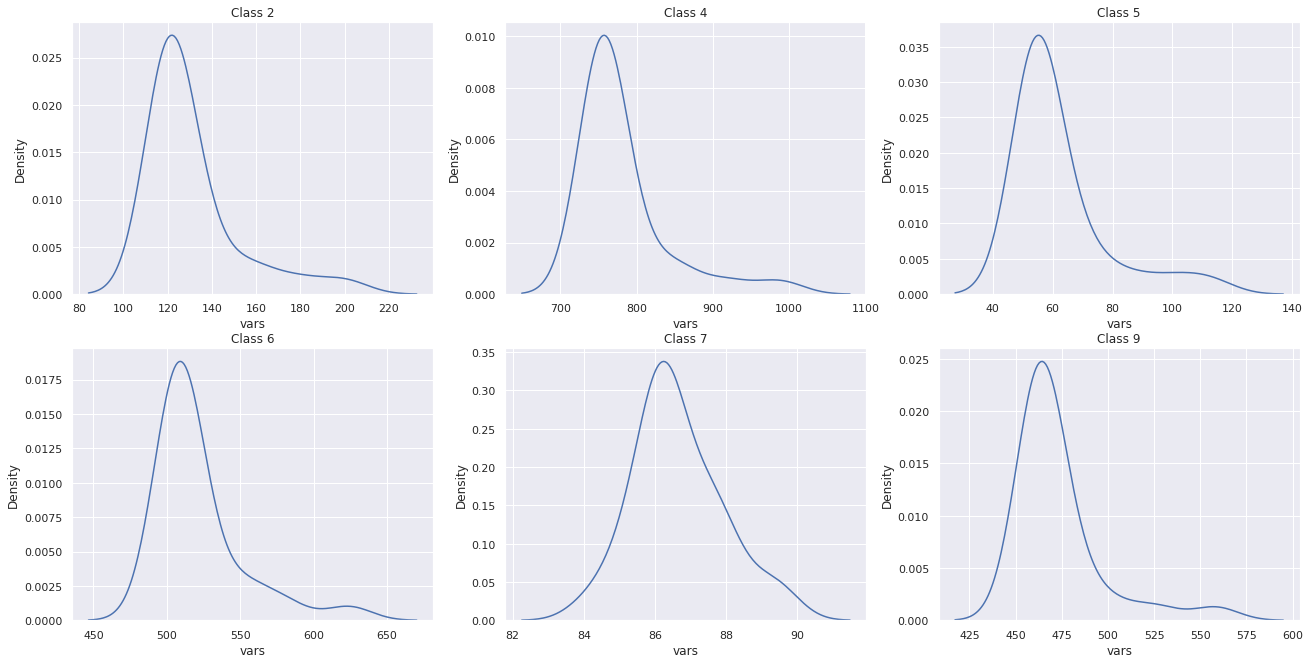

In [ ]:
# check if our F-test is even valid (variance must be close to Gaussian distributed)
fig, ax = plt.subplots(2, 3, figsize=(22, 11))
mclass_ind = 0
motif_classes_list = [2, 4, 5, 6, 7, 9]
for i in range(2): # loop over classes ignoring the last one
  for j in range(3):
    curr_class = motif_classes_list[mclass_ind]
    sns.kdeplot(vars_table_temp[vars_table_temp['motif'] == curr_class]['vars'], ax=ax[i, j])
    ax[i,j].title.set_text("Class {}".format(curr_class))
    mclass_ind += 1

(0.0, 100.0)

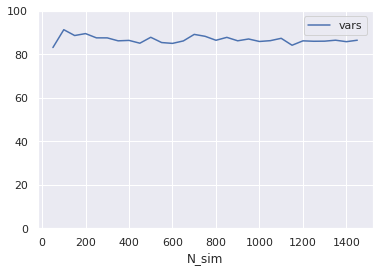

In [ ]:
# check the FFL motif
FFL_motif = vars_table[vars_table['motif'] == 7]
FFL_motif.plot(x='N_sim', y='vars')
plt.ylim(0.0, 100.0)

**Yeast**

In [ ]:
Y_vars_table_temp = pd.DataFrame(
    {'N_sim': N_sim_Y,
     'vars': vars_Y
    })

Text(0, 0.5, 'P-Values')

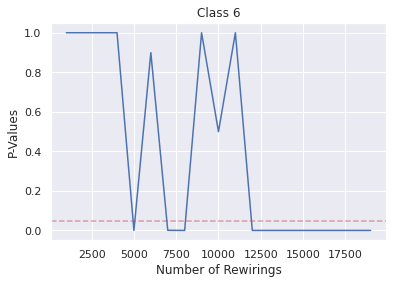

In [ ]:
Y_results = run_f_tests(Y_vars_table_temp)

Y_results.plot(x='n_s', y='p_s', legend=False)
plt.axhline(y = 0.05, color = 'r', linestyle = '--', alpha=0.5, label='Threshold p=0.05')
plt.title("Class 6")
plt.xlabel('Number of Rewirings')
plt.ylabel('P-Values')

# Conclusion

Follow up studies could revolve around:

*   limitations of igraph not having native abilities to do parallel processing
*   How the number of simulations affect resolution in determining the minimum required rewirings
*   Getting enough CPU bandwidth to evaluate yeast and mouse gene regulatory networks, especially if we want to do the simulation for multiple motif classes (This is to see how much more the minimum threshold increases due to network complexity)
*   Assess time complexity of the rewiring
*   Assess motif count variations for background distributions and assess bias.
*   How does our conclusions change if we don't work with the assumption of overrepresented motifs?














# References and Acknowledgements

E Coli Data: Steve

Yeast:

http://cosbi3.ee.ncku.edu.tw/YTRP/Home

Mouse:

https://regnetworkweb.org/download.jsp